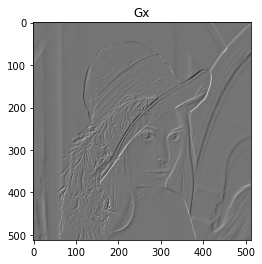

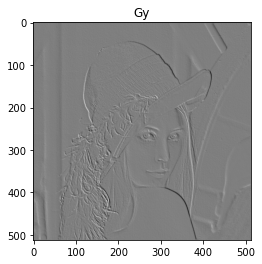

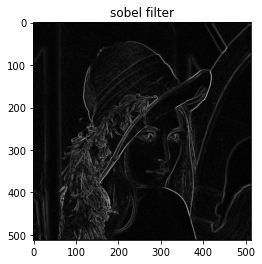

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = 'lena.png'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

height, width = img.shape


horizontal_mask = np.array([[1, 0], [0, -1]])
vertical_mask = np.array([[0, 1], [-1, 0]])


# horizontal_mask = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
# vertical_mask = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])


st = horizontal_mask.shape[0]//2
ed = horizontal_mask.shape[1]//2

Gx = np.zeros((height, width))
Gy = np.zeros((height, width))

# horizontal edge detection
for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gx[row, col] = np.sum(img[row-st:row+st, col-ed:col+ed] * horizontal_mask)
    # for i in range(-st, st+1):
    #   for j in range(-ed, ed+1):
    #     Gx[row, col] += img[row+i, col+j] * horizontal_mask[i+st, j+ed]

# vertical edge detection
for row in range(st, height-st):
  for col in range(ed, width-ed):
    Gy[row, col] = np.sum(img[row-st:row+st, col-ed:col+ed] * vertical_mask)
    # for i in range(-st, st+1):
    #   for j in range(-ed, ed+1):
    #     Gy[row, col] += img[row+i, col+j] * vertical_mask[i+st, j+ed]

# combining Gx and Gy
G = np.sqrt(Gx**2 + Gy**2)

plt.title('Gx')
plt.imshow(Gx, cmap='gray')
plt.show()

plt.title('Gy')
plt.imshow(Gy, cmap='gray')
plt.show()

plt.title('sobel filter')
plt.imshow(G, cmap='gray')